In [159]:
import matplotlib.pyplot as plt
# This program uses MiniConda Python 3.8
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf

In [160]:
def func(x, a, b):
    return a * np.exp(-b * x)


def r_squared(x, y, a, b):
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 5)
    print(r_sq)


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


def output(x, y, p0):
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [161]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
all_coupons = pd.read_csv('D:/GDrive/bayer_curves.csv')
p0 = [1.0, .05]

Sunday FSi R^2 & Fit Chart
0.81252


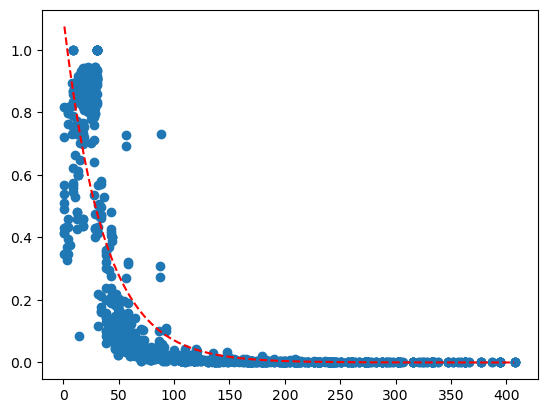

Equation - y=1.10464*exp^(-0.02747*x)


In [162]:
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "SUNDAY FSI"]
np_sun_fsi = sun_fsi[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSi R^2 & Fit Chart')
a, b = output(x, y, p0)
print('Equation - y=' + a.astype(str) + '*exp^(-' + b.astype(str) + '*x)')

Paperless R^2 & Fit Chart
0.69926


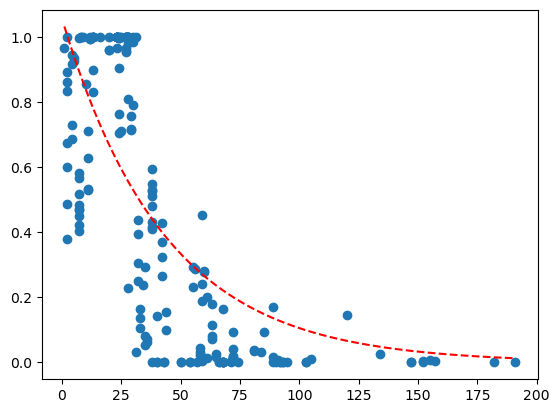

Equation - y=1.05793*exp^(-0.02303*x)


In [163]:
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "PAPERLESS"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)
print('Equation - y=' + a.astype(str) + '*exp^(-' + b.astype(str) + '*x)')

Paperless + Print Group R^2 & Fit Chart
0.73418


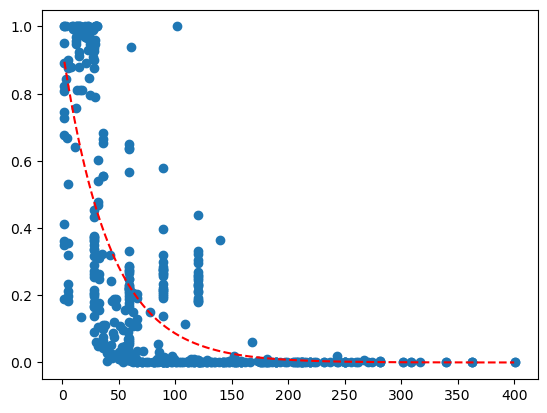

Equation - y=0.93864*exp^(-0.02384*x)


In [164]:
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve
paper_print1 = all_coupons[all_coupons["Media_Type"] == "PAPERLESS + PRINT AT HOME"]
paper_print2 = (all_coupons[all_coupons["Media_Type"] == "PRINT AT HOME"])
paper_print3 = (all_coupons[all_coupons["Media_Type"] == "PAPERLESS + PRINT AT HOME + HANDOUT"])
paper_print4 = paper_print1.append(paper_print2, ignore_index=True)
paper_print = paper_print4.append(paper_print3, ignore_index=True)

np_paper_print = paper_print[['Time_Since_Issue',
                              'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)
print('Equation - y=' + a.astype(str) + '*exp^(-' + b.astype(str) + '*x)')

Handout Group R^2 & Fit Chart
0.83064


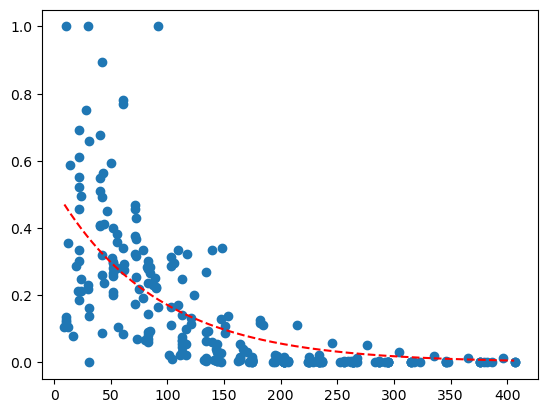

Equation - y=0.51968*exp^(-0.01112*x)


In [165]:
# Handout Checkout Curve
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout1 = all_coupons[all_coupons["Media_Type"] == "HANDOUT"]
handout2 = (all_coupons[all_coupons["Media_Type"] == "HANDOUT IN-STORE"])
handout3 = (all_coupons[all_coupons["Media_Type"] == "HANDOUT IN-STORE DISPLAY"])
handout4 = (all_coupons[all_coupons["Media_Type"] == "HANDOUT IN-STORE TEARPAD"])
handout5 = (all_coupons[all_coupons["Media_Type"] == "HANDOUT SHELF DISPENSER"])
handout6 = (all_coupons[all_coupons["Media_Type"] == "HANDOUT WITH SAMPLE"])
handout7 = (all_coupons[all_coupons["Media_Type"] == "INSTANT ON-PACK"])
handout8 = (all_coupons[all_coupons["Media_Type"] == "INSTANT ON-PACK FACTORY APPLIED"])
handout9 = (all_coupons[all_coupons["Media_Type"] == "ON-PACK"])
handout_temp1 = handout1.append(handout2, ignore_index=True)
handout_temp2 = handout_temp1.append(handout3, ignore_index=True)
handout_temp3 = handout_temp2.append(handout4, ignore_index=True)
handout_temp4 = handout_temp3.append(handout5, ignore_index=True)
handout_temp5 = handout_temp4.append(handout6, ignore_index=True)
handout_temp6 = handout_temp5.append(handout7, ignore_index=True)
handout_temp7 = handout_temp6.append(handout8, ignore_index=True)
handout = handout_temp7.append(handout9, ignore_index=True)

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)
print('Equation - y=' + a.astype(str) + '*exp^(-' + b.astype(str) + '*x)')

All Other Group R^2 & Fit Chart
0.71011


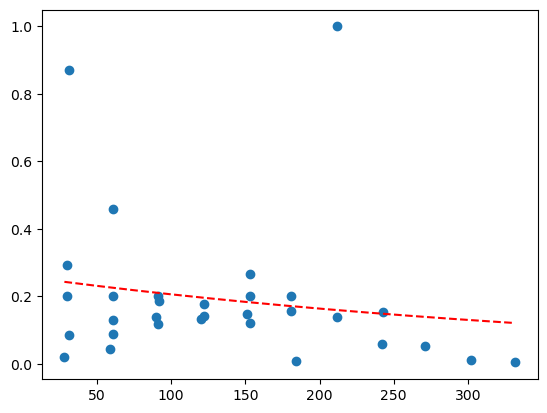

Equation - y=0.25901*exp^(-0.0023*x)


In [166]:
# All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO

misc1 = all_coupons[all_coupons["Media_Type"] == "MISCELLANEOUS MEDIA"]
misc2 = (all_coupons[all_coupons["Media_Type"] == "DIRECT MAIL SOLO"])
misc3 = (all_coupons[all_coupons["Media_Type"] == "DIRECT MAIL"])
misc_temp1 = misc1.append(misc2, ignore_index=True)
misc = misc_temp1.append(misc3, ignore_index=True)

np_misc = misc[['Time_Since_Issue',
                'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_misc[:, 0]
y = np_misc[:, 1]

print('All Other Group R^2 & Fit Chart')
a, b = output(x, y, p0)
print('Equation - y=' + a.astype(str) + '*exp^(-' + b.astype(str) + '*x)')
